## KERAS LSTM (CNN) İLE UÇAK YOLCU SAYISI TAHMİNİ(ZAMAN SERİSİ TAHMİNİ) PROJESİ

Soru: Önceki iki aya ait yolcu sayısı (bin olarak)
verildiğinde, gelecek ay yolcu sayısı kaçtır?

Bu proje için Airline Passenger veri setini kullanacağız. Bu veri seti,
1949'dan 1960'a kadar bir ABD havayolu şirketinin aylık toplam yolcu
sayılarını sağlar. Veri setini aşağıdaki Kaggle bağlantısından
indirebilirsiniz:
https://www.kaggle.com/chirag19/air-passengers

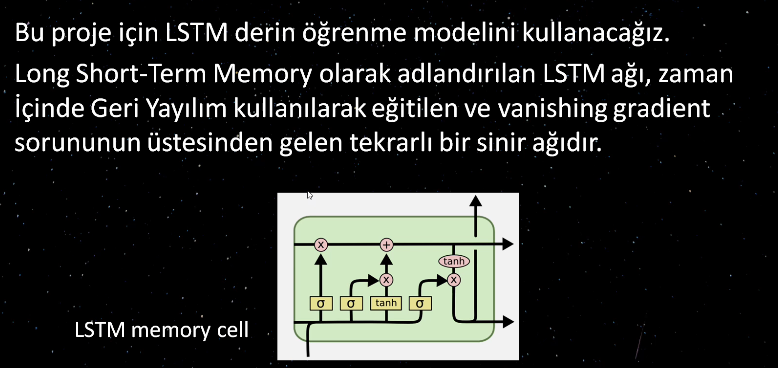

LSTM, makine öğrenimindeki zor sıralama problemlerini ele almak
ve son teknoloji sonuçlar elde etmek için kullanılabilecek
recurrent ağlar oluşturmak için kullanılabilir. Dolayısıyla LSTM,
zaman serisi tahmini için iyi bir seçimdir.

In [3]:
!pip install scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.3 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.3 MB 3.9 MB/s eta 0:00:03
   ------------ --------------------------- 2.9/9.3 MB 5.6 MB/s eta 0:00:02
   ------------------ --------------------- 4.2/9.3 MB 6.4 MB/s eta 0:00:01
   --------------------------- ------------ 6.3/9.3 MB 6.8 MB/s eta 0:00:01
   ------------------------------ --------- 7.1/9.3 MB 6.8 MB/s eta 0:00:01
   --------------------------------- ------ 7.9/9.3 MB 6.0 MB/s eta 0:00:01
   ------------------------------------ --- 8.4/9.3 MB 5.5 MB/s eta 0:00:01
   -------------------------------------- - 8.9/9.3 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 9.3/9.3 MB 4.9 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (30

In [4]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [7]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
data.rename(columns={'#Passengers':'passengers'},inplace=True)

data =data['passengers']    # ay bilgisini yok ediyorum siliyorum.

In [12]:
type(data)  # series genelde kullanılmaz ya numpy array olacak yada dataframe

pandas.core.series.Series

In [13]:
data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

In [41]:
data = np.array(data).reshape(-1,1)

# 2D arraye dönüştürücem.
 # minmaxscaler ya 2D array ya da dataframe istiyor.

In [42]:
type(data)

numpy.ndarray

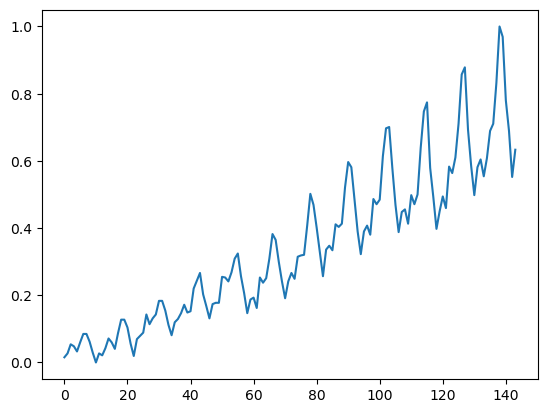

In [43]:
plt.plot(data)
plt.show()

## Scaling   
0 ile 1 arasına scale ediyoruz.

In [44]:
len(data)

144

In [55]:
type(data)

numpy.ndarray

In [51]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

## Train,Test Split

In [54]:
len(data)

144

In [21]:
train = data[0:100,:]
test = data[100:,:]

In [25]:
def get_data(data,steps):
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps),0]
        dataX.append(a)
        dataY.append(data[i+steps,0])
        return np.array(dataX),np.array(dataY)

# eğitim seti hazırlamama yardım ediyor.
# yukarıdaki np arrayi vererek eğitim olmaz .
# bu fonksiyon 2 yi steps yerie yazmadık parametrik yapmak istiyorum.
 # step 32 demek ilk iki veriyi al 3 ü tahmin et sonra 2 3 ü al 4 ü tahmin et gibi gider.

In [35]:
steps = 2 
# 2 ay veriyoruz 3 üncüyü istiyoruz tahmin etmesini.

In [36]:
X_train , y_train = get_data(train,steps)
X_test, y_test = get_data(test,steps)

In [37]:
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [40]:
steps = 2  # Zaman adımı sayısı
features = 1  # Özellik sayısı
model.add(LSTM(128, input_shape=(steps, features))) #fist hidden alyer with 128 memory cell
model.add(Dense(64))    # second hidde nalyer with 64 memory cell
model.add(Dense(1))    # output layer
model.compile(loss= 'mean_squared_error', optimizer='adam')

NotImplementedError: Cannot convert a symbolic Tensor (lstm_5/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, y_train,epochs=25,batch_size=1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_tesy)

In [ ]:
plt.plot(y_test,label='real number of passenger')
plt.plot(y_pred,label='predicted number of passenger')
plt.xlabel('Months')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()